In [1]:
import pandas as pd

In [35]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# 1. Change Types

In [17]:
dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

To change types...

In [21]:
dataset.Country = dataset.Country.astype('category')

In [23]:
dataset.dtypes

Country      category
Age           float64
Salary        float64
Purchased      object
dtype: object

In [28]:
dataset.Country.cat.categories

Index([u'France', u'Germany', u'Spain'], dtype='object')

In [29]:
dataset.Country.cat.codes

0    0
1    2
2    1
3    2
4    1
5    0
6    2
7    0
8    1
9    0
dtype: int8

In [32]:
#to change all objects to category
pd.concat([dataset.select_dtypes([], ['object']),
          dataset.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')], axis = 1).dtypes

Country      category
Age           float64
Salary        float64
Purchased    category
dtype: object

In [ ]:
#to create ordered categories
dataset.Country.cat.set_categories([-3, -2, -1, 0, 1, 2, 3], ordered = True, inplace = True)

In [ ]:
#datetime
pd.read_csv('Data.csv', parse_dates=["col_name"])
#or
def add_datepart(df, fldname):
    fld = df[fldname]
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    df.drop(fldname, axis=1, inplace=True)

**add_datepart(df_raw, ‘saledate’) will create new columns:**<br>
df_raw.saleYear: sale year<br>
df_raw.saleMonth - sale month<br>
df_raw.saleWeek<br>
df_raw.saleDay<br>
df_raw.saleDayofweek<br>
df_raw.saleDayofyear<br>
df_raw.saleIs_month_start<br>
df_raw.saleIs_month_end<br>
df_raw.saleIs_quarter_end<br>
df_raw.saleIs_quarter_start<br>
df_raw.saleIs_year_end<br>
df_raw.saleIs_year_start<br>
df_raw.saleElapsed <br>

To automatically set type upon reading csv...

In [ ]:
dataset = pd.read_csv('Data.csv', dtype={
    'Country': 'category',
    'Age': 'float64',
    'Salary': 'float64',
    'Purchased': 'category'
})

Numpy types:

np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex192],<br>
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float96],<br>
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int32, numpy.int64],<br>
 'others': [bool, object, str, unicode, numpy.void],<br>
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint32, numpy.uint64]}

Pandas types:

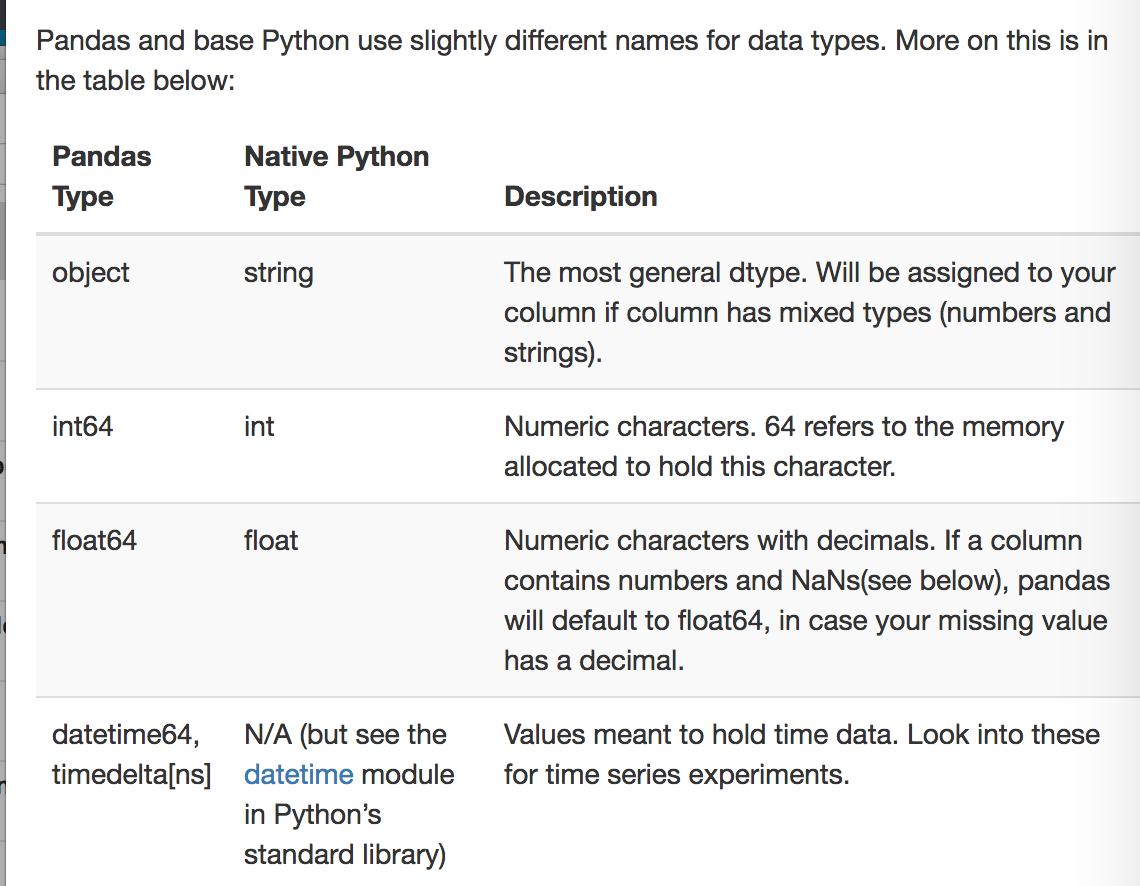

# 2. Missing Data

We can see here that Age and Salary columns have NaN values.

To check nulls...

In [37]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [36]:
dataset.isnull().sum()/len(dataset)

Country      0.0
Age          0.1
Salary       0.1
Purchased    0.0
dtype: float64

a) One way to deal is to drop NaN rows

In [7]:
dataset.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


b) However, imputation might be better if there are many NaN rows or if we don't want to lose crucial data

In [8]:
#using sklearn
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

Parameters:<br>
- missing_values: what to impute for
- strategy: 'mean', 'median', or 'most_frequent'
- axis: 0 for mean across column, 1 for mean across rows

In [10]:
imputer = imputer.fit(dataset.iloc[:, 1:3].values)

In [15]:
dataset.iloc[:, 1:3] = imputer.transform(dataset.iloc[:, 1:3])

In [16]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


c) Fill nas manually with whatever value

In [ ]:
#manually
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)

#in case nans are represented by some other value e.g. ?
dataset[datset=='?']=np.nan
#or
dataset = dataset.replace("?", float("Nan"))

# 3. Categorical Variables

In [ ]:
#pd.get_dummies
auto_dum = pd.get_dummies(auto1, columns=auto1.select_dtypes(['category']).columns.drop('make'))

In [ ]:
#sklearn
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarraby()
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# 4. Feature Scaling

Scaling is necessary because a lot of ML models based on Euclidean distance. For example, if age range is 27-50 and salary is 40k-90k, the difference in scale will mean that distance is dominated by salary.

Two ways to scale:<br>
1) **Standardisation:** [x-mean(x)]/stdev(x) <br>
2) **Normalisation:** [x-min(x)]/[max(x)-min(x)] <br>

In [ ]:
#sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

data = {'score': [234,24,14,27,-74,46,73,-18,59,160]}
df = pd.DataFrame(data)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)

In [ ]:
#manually
df_norm = (df - df.mean()) / df.std() #.std(ddof=0) for population 
#use train stats for test data
df_norm = (df - df.mean()) / (df.max() - df.min())

# 5. Train/test split

In [ ]:
#sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#random state - like seed (used for random sampling)

In [ ]:
#manually
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
#n is length of training data